<a href="https://colab.research.google.com/github/adrian2504/sentiment/blob/main/ADRIAN_RGIT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 
###:-) 
###:-(
###:-|

In [ ]:
# Importing all the libraries:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing,linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [ ]:
# data source link : 
# https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

from google.colab import files
files.upload()

In [ ]:
# Importing the data
# Import the data that was downloaded in the last step:
df = pd.read_csv("amazon_cells_labelled.txt",sep = '\t',header = None,names = ['review','sentiment'])

In [ ]:
dfyelp = pd.read_csv("yelp_labelled.txt",sep = '\t',header = None,names = ['review','sentiment'])

In [ ]:
dfyelp.head()

In [ ]:
dfmovie = pd.read_csv("imdb_labelled.txt",sep = '\t',header = None,names = ['review','sentiment'])

In [ ]:
dfmovie.head()

In [ ]:
# See top 5 rows
df.head()

In [ ]:
df.shape

In [ ]:
dfyelp.shape

In [ ]:
dfmovie.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# review distribution
df.groupby('sentiment').sentiment.count()

In [ ]:
# Lets plot it and see
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').review.count().plot.bar(ylim=0)
plt.show()

In [ ]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10,).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dfmovie.review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10,).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dfyelp.review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10,).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
df.shape

In [ ]:
df.head()

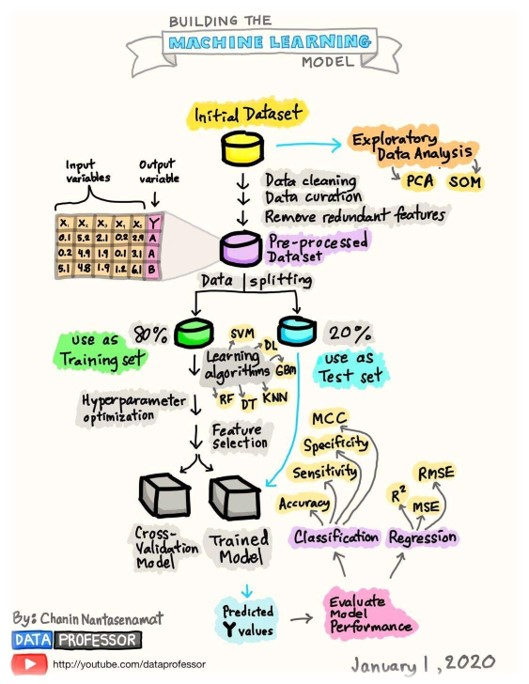

In [ ]:
# Splitting the data
# Split the data into train and validation:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['review'], df['sentiment'], train_size=0.8)

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
print(y_train.shape)
y_train

In [ ]:
X_test.shape

In [ ]:
y_test.shape

[TF-IDF Term frequency - Inverse Document Frequency](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/)

In [ ]:
# Feature engineering using TF-IDF
# Create TF-IDF vectors  

tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',max_features=5000)

tfidf_vect.fit(df['review'])
print(tfidf_vect.get_feature_names())

In [ ]:

xtrain_tfidf = tfidf_vect.transform(X_train)
xtest_tfidf = tfidf_vect.transform(X_test)
print(xtrain_tfidf[0:3])

In [ ]:
xtrain_tfidf.shape

In [ ]:
xtest_tfidf.shape

In [ ]:
lr = LogisticRegression(max_iter=500)
model = lr.fit(xtrain_tfidf, y_train)
model

In [ ]:
y_pred = model.predict(xtest_tfidf)

# Checking accuracy
accuracy = metrics.accuracy_score(y_pred,y_test)
print ("Accuracy: ", accuracy)

In [ ]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83        94
           1       0.91      0.74      0.81       106

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[86,  8],
       [28, 78]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xtest_tfidf, y_test,values_format = '')
plt.show()

In [ ]:
# Prediction example
texts = ["excellent bluetooth headset."]

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)

# id_to_category -> is defined above
#print(" - Predicted as: '{}'".format(predictions[0]))
print(" - Predicted as: '{}'".format(predictions[0]))

['excellent bluetooth headset.']
 - Predicted as: '1'
